In [42]:
import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/CODSOFT/IMDb Movies India.csv'
df = pd.read_csv(file_path, encoding='latin-1')

# Display the first few rows and inspect columns
print(df.head())
print(df.columns)


                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Kapoor  
4    

In [45]:
# Check for non-numeric values in 'Votes'
non_numeric_votes = df[~df['Votes'].astype(str).str.isdigit()]
print(non_numeric_votes[['Name', 'Votes']])

# Convert 'Votes' to numeric, coercing errors to NaN
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')

# Fill missing values for 'Votes' with mean
df['Votes'].fillna(df['Votes'].mean(), inplace=True)



                                     Name       Votes
0                                          120.839493
1      #Gadhvi (He thought he was Gandhi)    8.000000
2                             #Homecoming  120.839493
3                                 #Yaaram   35.000000
4                       ...And Once Again  120.839493
...                                   ...         ...
15504                 Zulm Ko Jala Doonga   11.000000
15505                               Zulmi  655.000000
15506                           Zulmi Raj  120.839493
15507                       Zulmi Shikari  120.839493
15508                        Zulm-O-Sitam   20.000000

[15509 rows x 2 columns]


In [65]:
df.dropna(subset=df.columns[1:9],how='all',inplace=True)
df.dropna(subset=['Name','Year'],how='all',inplace=True)
df.drop_duplicates(['Name','Year'],keep='first',inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15477 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15477 non-null  object 
 1   Year      14958 non-null  object 
 2   Duration  7235 non-null   object 
 3   Genre     13614 non-null  object 
 4   Rating    7915 non-null   float64
 5   Votes     7916 non-null   object 
 6   Director  14962 non-null  object 
 7   Actor 1   13875 non-null  object 
 8   Actor 2   13110 non-null  object 
 9   Actor 3   12355 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.3+ MB


In [66]:
df.dropna(subset=['Year'],inplace=True)
df['Year']=df['Year'].str.extract(r'([0-9].{0,3})',expand=False)
df['Duration']=df['Duration'].str.extract(r'([0-9]+)',expand=False)
def get_mode_with_default(x):
    mode_result = x.mode()
    if not mode_result.empty:
        return mode_result[0]
    else:
        return 'unknown'

df['Actor 1']=df['Actor 1'].fillna(df.groupby('Year')['Actor 1'].transform(get_mode_with_default))
df['Actor 2']=df['Actor 2'].fillna(df.groupby('Year')['Actor 2'].transform(get_mode_with_default))
df['Actor 3']=df['Actor 3'].fillna(df.groupby('Year')['Actor 3'].transform(get_mode_with_default))
df['Director']=df.groupby(['Year','Actor 1','Actor 2','Actor 3'])['Director'].transform(get_mode_with_default)

In [70]:
import pandas as pd
import math

# Assuming df is already loaded with your dataset
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')


In [71]:
def get_mean_with_default(x):
    mean_result = x.mean()
    if not math.isnan(mean_result):
        return round(mean_result)
    else:
        return 0

df['Duration'] = df.groupby(['Year', 'Director', 'Actor 1', 'Actor 2', 'Actor 3'])['Duration'].transform(get_mean_with_default)


In [72]:
df['Rating'] = df.groupby(['Director', 'Actor 1'])['Rating'].transform('mean')
df['Rating'] = df.groupby(['Director', 'Actor 2'])['Rating'].transform('mean')
df['Rating'] = df.groupby(['Director', 'Actor 3'])['Rating'].transform('mean')


In [73]:
df['Rating'] = df.groupby(['Year', 'Director'])['Rating'].transform('mean')


In [74]:
df['Rating'] = df.groupby('Year')['Rating'].transform('mean')


In [75]:
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Extract numeric values from 'Votes' using regex and convert to numeric
df['Votes'] = df['Votes'].str.extract(r'(\d+)', expand=False)
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')


In [76]:
df['Votes'] = df.groupby(['Year', 'Rating'])['Votes'].transform('mean')


In [77]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 14958 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      14958 non-null  object 
 1   Year      14958 non-null  int64  
 2   Duration  14958 non-null  int64  
 3   Genre     13123 non-null  object 
 4   Rating    14947 non-null  float64
 5   Votes     14908 non-null  float64
 6   Director  14958 non-null  object 
 7   Actor 1   14958 non-null  object 
 8   Actor 2   14958 non-null  object 
 9   Actor 3   14958 non-null  object 
dtypes: float64(2), int64(2), object(6)
memory usage: 1.3+ MB


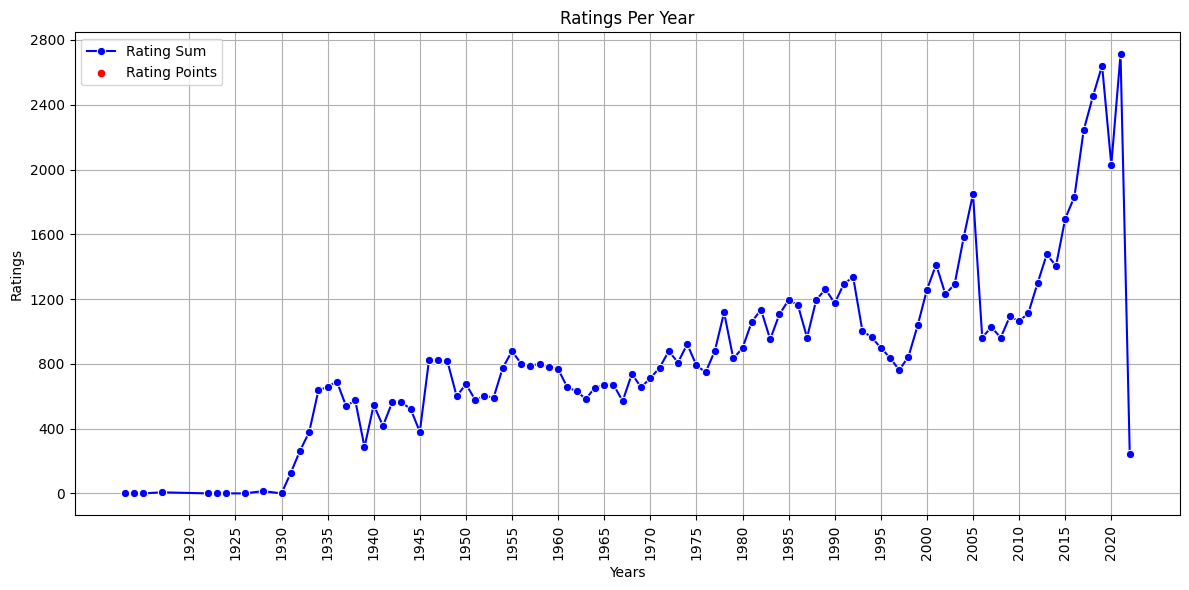

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Example data (replace with your actual DataFrame)
# rating_sum = df.groupby('Year')['Rating'].sum().reset_index()
# If you have already calculated rating_sum, use it directly; otherwise, uncomment the line above and adjust df and Rating accordingly.

# Assuming you have the rating_sum DataFrame grouped by Year and aggregated Rating

plt.figure(figsize=(12, 6))

# Line plot with scatter points
sns.lineplot(x='Year', y='Rating', data=rating_sum, marker='o', color='b', label='Rating Sum')
sns.scatterplot(x='Year', y='Rating', data=rating_sum, color='r', label='Rating Points')

plt.yticks(np.arange(0, 3000, 400))  # Adjust y-axis ticks as needed
plt.xticks(np.arange(1920, 2025, 5), rotation=90)  # Adjust x-axis ticks and rotation as needed
plt.ylabel('Ratings')
plt.xlabel('Years')
plt.title('Ratings Per Year')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


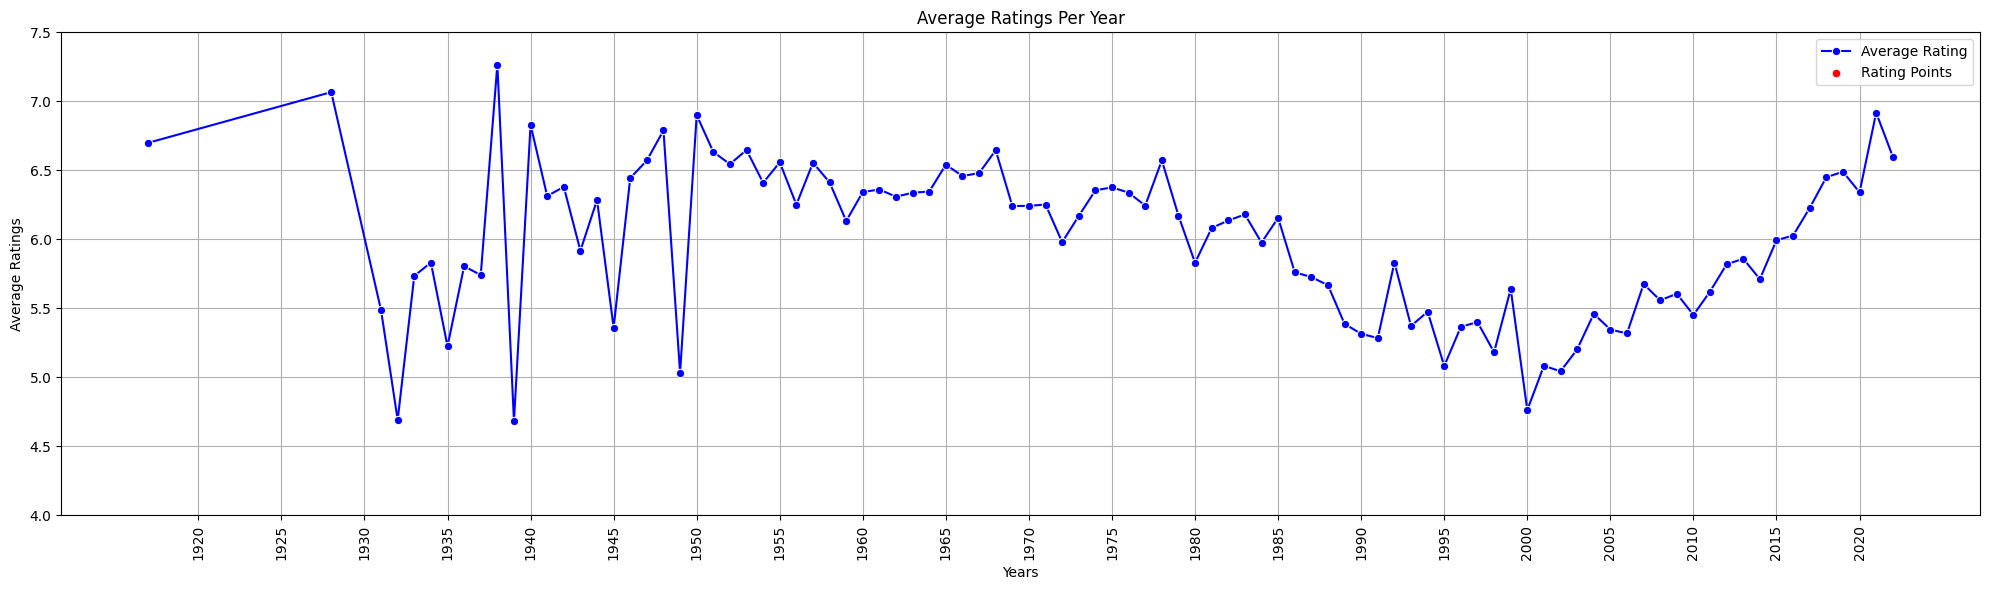

In [82]:


# Assuming df is your DataFrame with movie data

# Compute average ratings per year
rating_avg = df.groupby('Year')['Rating'].mean().reset_index()

plt.figure(figsize=(20, 6))

# Line plot with scatter points
sns.lineplot(x='Year', y='Rating', data=rating_avg, marker='o', color='b', label='Average Rating')
sns.scatterplot(x='Year', y='Rating', data=rating_avg, color='r', label='Rating Points')

plt.yticks(np.arange(4, 8, 0.5))  # Adjust y-axis ticks as needed
plt.xticks(np.arange(1920, 2025, 5), rotation=90)  # Adjust x-axis ticks and rotation as needed
plt.ylabel('Average Ratings')
plt.xlabel('Years')
plt.title('Average Ratings Per Year')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


<ipython-input-85-dacee8ad80b8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20.index, y=top_20.values, palette='viridis')


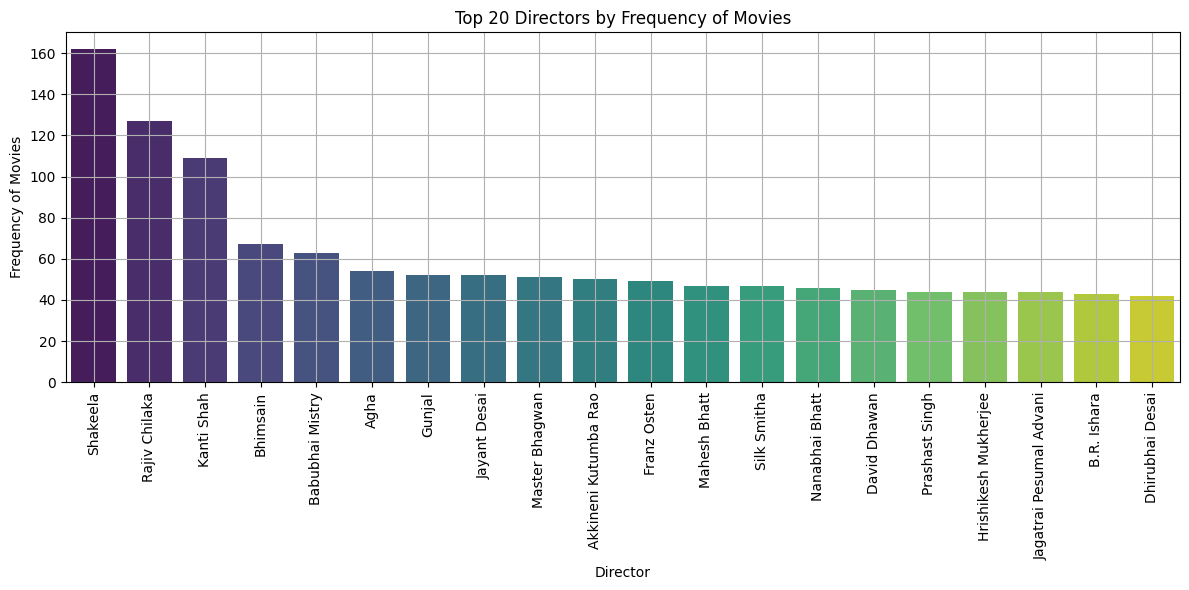

In [85]:
# Compute top 20 directors by frequency of movies
top_20 = df['Director'].value_counts().head(20)

plt.figure(figsize=(12, 6))

# Bar plot
sns.barplot(x=top_20.index, y=top_20.values, palette='viridis')

plt.xticks(rotation=90)
plt.ylabel('Frequency of Movies')
plt.xlabel('Director')
plt.title('Top 20 Directors by Frequency of Movies')
plt.grid(True)

plt.tight_layout()
plt.show()


In [86]:
#Top 10 movies according to rating per year and overall.
overall=df.nlargest(10,'Rating')
overall=overall.reset_index(drop=True)
print("Top 10 Movies Overall:")
overall

Top 10 Movies Overall:


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,Abhagin,1938,151,NaN,7.266085,9.555556,Prafulla Roy,Molina Devi,Prithviraj Kapoor,Vijay Kumar
1,Abhilasha,1938,134,NaN,7.266085,9.555556,Zia Sarhadi,Mahendra Thakore,M. Kumar,Bibbo
2,Adhikar,1938,132,NaN,7.266085,9.555556,P.C. Barua,P.C. Barua,Jamuna,Pahadi Sanyal
3,Baazigar,1938,152,NaN,7.266085,9.555556,Mohan Dayaram Bhavnani,K.L. Saigal,Ashok Kumar,Bibbo
4,Baghban,1938,159,Drama,7.266085,9.555556,Abdul Rashid Kardar,Bimla Kumari,B. Nandrekar,Sitara Devi
5,Bahadur Kisan,1938,0,NaN,7.266085,9.555556,Master Bhagwan,Chandrarao,Chandrarao,Hansa Wadkar
6,Ban Ki Chidiya,1938,0,Action,7.266085,9.555556,Jayant Desai,Madhuri,Eddie Billimoria,Ishwarlal
7,Banke Sanvaria,1938,0,NaN,7.266085,9.555556,Nanubhai Vakil,Navinchandra,Vatsala Kumthekar,Yasmin
8,Bhabi,1938,0,"Drama, Family",7.266085,9.555556,Franz Osten,Renuka Devi,Paidi Jairaj,Meera
9,Bhedi Trishul,1938,0,NaN,7.266085,9.555556,A.M. Khan,Ameena,Ansari,Kamia


In [92]:
def out(df,col,dis):
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    lower=q1-(iqr*dis)
    upper=q3+(iqr*dis)
    return lower,upper
votes_low,votes_up=out(df,'Votes',1.5)
vote_out_count=(df['Votes'] > votes_up) | (df['Votes'] < votes_low)
df['Votes'][vote_out_count].count()

0

In [93]:
df=df[(df['Votes']>votes_low) & (df['Votes']<votes_up)]
year_low,year_upper=out(df,'Year',1.5)
year_out_count=(df['Year']>year_upper) | (df['Year']<year_low)
df['Year'][year_out_count].count()

0

<Axes: >

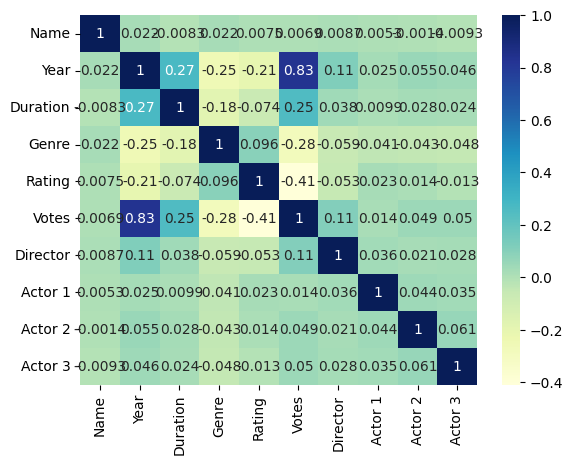

In [94]:
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True)

In [95]:
df=df[(df['Year']>year_low) &(df['Year']<year_upper)]
df.shape

(14908, 10)

In [96]:
from sklearn.preprocessing import LabelEncoder
LB=LabelEncoder()
df['Name']=LB.fit_transform(df['Name'])
df['Genre']=LB.fit_transform(df['Genre'])
df['Director']=LB.fit_transform(df['Director'])
df['Actor 1']=LB.fit_transform(df['Actor 1'])
df['Actor 2']=LB.fit_transform(df['Actor 2'])
df['Actor 3']=LB.fit_transform(df['Actor 3'])

In [97]:
from sklearn.linear_model import LinearRegression
LR=LinearRegression()

In [98]:
from sklearn.model_selection import train_test_split
x=df.drop('Rating',axis=1)
y=df['Rating']

In [99]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=42)


In [100]:
LR.fit(train_x,train_y)
pre_test=LR.predict(test_x)

In [101]:
pre_test

array([6.04713016, 6.15112636, 5.86116002, ..., 6.05479068, 5.9215346 ,
       5.68787505])

In [102]:
train=LR.predict(train_x)

In [106]:
from lightgbm import LGBMRegressor
LGBMR = LGBMRegressor(n_estimators=100, random_state=60)
LGBMR.fit(train_x, train_y)
lgbm_pre_test = LGBMR.predict(test_x)
lgbm_pre_train=LGBMR.predict(train_x)
r2_test_lgbm=r2_score(test_y,lgbm_pre_test)
r2_train_lgbm=r2_score(train_y,lgbm_pre_train)
print("print r2_score",r2_test_lgbm)
print('print r2_score',r2_train_lgbm)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001957 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1818
[LightGBM] [Info] Number of data points in the train set: 10435, number of used features: 9
[LightGBM] [Info] Start training from score 5.926575
print r2_score 0.9999862426800425
print r2_score 0.9996769804772999
